<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [11]:
## Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sns

In [12]:
## Create random data points (circles)
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [13]:
# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [14]:
## Check data
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.002767   -0.000540
std      0.526197    0.524595
min     -1.021745   -1.087618
25%     -0.306588   -0.293955
50%      0.001552    0.001028
75%      0.295523    0.279826
max      1.085670    1.113921

Sample of X__________________________________________________
          A         B
0 -0.371465  0.040439
1 -0.754679  0.693615
2 -0.228689  0.027304
3 -0.373412 -0.082625
4  0.527911 -0.848465


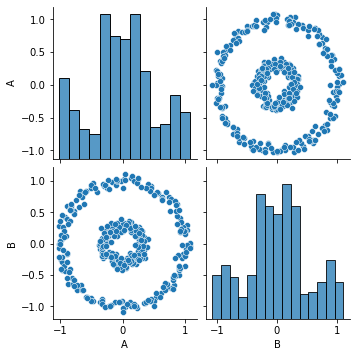

In [15]:
sns.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [16]:
# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    
    centroids = [] # start with No centroids
    
    for i in range(K): # need one centroid for each cluster
        
        dimensions = [] # it can be multi-dimensional
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        
        centroids.append(dimensions) # add all dimensions for the centroids of each cluster

    return centroids

In [17]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( ( (p - q) ** 2 ).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [18]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    for i in range(len(centroids)): # for each of the existing centroids
        
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            for f in X.columns: # for all the features
                x = X[f][y == i].mean() # calculate the mean
                dimensions.append(x)
            c.append(dimensions)
        
        else: # if a cluster got no members
            #print('Keep', y, i)
            c.append(centroids[i]) # keep the previous coordinates

    return c

In [19]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, title, show_clusters=False):
        
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title(title)

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(centroids)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    
    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.2f, %.2f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)
    ax.legend(loc=2)

Initial centroids: 
(0.75, -0.45)
(0.86, 0.66)
(-0.95, 0.43)
(-0.73, 0.36)
(-0.15, -0.83)
Step 0
(0.49, -0.25)
(0.50, 0.56)
(-0.91, 0.36)
(-0.32, 0.26)
(-0.20, -0.55)
Step 1
(0.47, -0.25)
(0.50, 0.62)
(-0.88, 0.26)
(-0.17, 0.27)
(-0.23, -0.56)
Step 2
(0.48, -0.27)
(0.53, 0.69)
(-0.88, 0.25)
(-0.13, 0.27)
(-0.24, -0.56)
Step 3
(0.48, -0.29)
(0.55, 0.71)
(-0.88, 0.25)
(-0.11, 0.26)
(-0.25, -0.56)
Step 4
(0.49, -0.30)
(0.55, 0.71)
(-0.88, 0.25)
(-0.10, 0.26)
(-0.25, -0.56)
Step 5
(0.49, -0.30)
(0.55, 0.71)
(-0.87, 0.27)
(-0.10, 0.25)
(-0.25, -0.56)
Step 6
(0.49, -0.30)
(0.55, 0.71)
(-0.86, 0.30)
(-0.09, 0.24)
(-0.26, -0.55)
Step 7
(0.49, -0.31)
(0.53, 0.72)
(-0.85, 0.33)
(-0.09, 0.22)
(-0.27, -0.56)
Step 8
(0.50, -0.31)
(0.52, 0.72)
(-0.84, 0.34)
(-0.08, 0.20)
(-0.27, -0.57)
Step 9
(0.50, -0.32)
(0.50, 0.74)
(-0.83, 0.35)
(-0.07, 0.18)
(-0.28, -0.58)
Step 10
(0.53, -0.31)
(0.47, 0.77)
(-0.82, 0.38)
(-0.07, 0.16)
(-0.30, -0.59)
Step 11
(0.56, -0.30)
(0.39, 0.80)
(-0.81, 0.41)
(-0.06, 0.10)

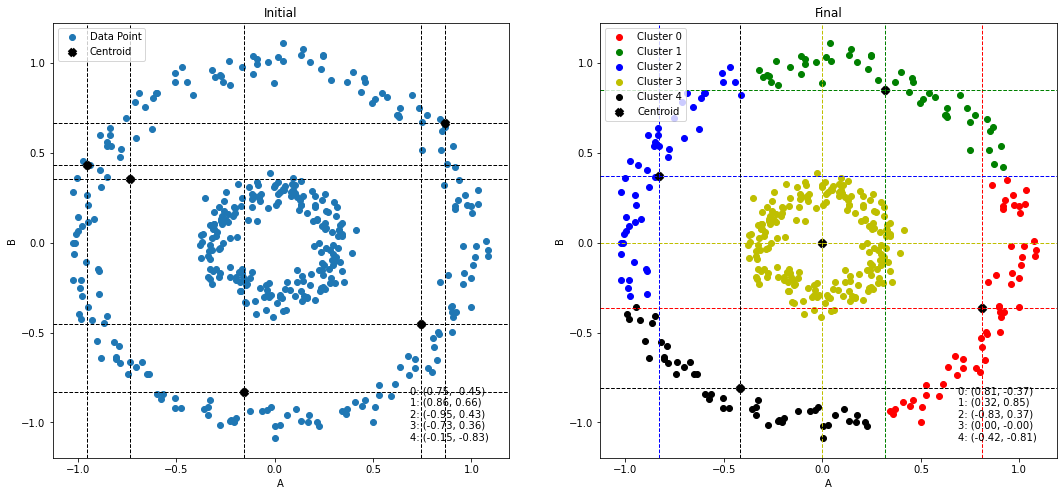

Final centroids: 
(0.81, -0.37)
(0.32, 0.85)
(-0.83, 0.37)
(0.00, -0.00)
(-0.42, -0.81)


In [20]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation
show_steps = True 
step = 0
# 1. Define the number of clusters `K`
K = 5 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
print("Initial centroids: \n{}".format('\n'.join(['(%.2f, %.2f)' % (c[0], c[1]) for c in centroids])))

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, title="Initial")

# repeat until makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values
    #print(y)
    
    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()
    
    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    
    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break
    
    # 7. For debugging
    if show_steps:
        print("Step {}".format(step))
        print('\n'.join(['(%.2f, %.2f)' % (c[0], c[1]) for c in centroids]))
    step += 1
    
# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids, title="Final", show_clusters=True)
plt.show()
print("Final centroids: \n{}".format('\n'.join(['(%.2f, %.2f)' % (c[0], c[1]) for c in centroids])))

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

© 2019 Institute of Data